# REGRESI SEDERHANA

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.DataFrame([[151,63],[174,81],[138,56],
                   [186,91],[128,47],[136,57],
                   [179,76],[163,72],[152,62],[131,48]])
df.columns = ['x', 'y']
df

,x,y
0,151,63
1,174,81
2,138,56
3,186,91
4,128,47
5,136,57
6,179,76
7,163,72
8,152,62
9,131,48


In [3]:
df.corr()

,x,y
x,1.00000,0.97713
y,0.97713,1.00000


In [4]:
x_train = df['x'].values[:,np.newaxis]
y_train = df['y'].values

In [5]:
lm = LinearRegression()
lm.fit(x_train,y_train) #fase training

LinearRegression()

In [6]:
x_test = [[170],[171],[160],[180],[150]]
p = lm.predict(x_test) #fase prediksi
print(p) #hasil prediksi


[76.22868928 76.90329973 69.48258478 82.97479377 62.73648029]


In [7]:
print('Coefficient : ' + str(lm.coef_))
print('Intercept : ' + str(lm.intercept_))

Coefficient : [0.67461045]
Intercept : -38.45508707607698


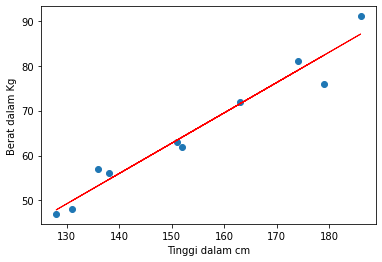

In [8]:
#prepare plot
pb = lm.predict(x_train)
dfc = pd.DataFrame({'x': df['x'],'y':pb})
plt.scatter(df['x'],df['y'])
plt.plot(dfc['x'],dfc['y'],color='red',linewidth=1)
plt.xlabel('Tinggi dalam cm')
plt.ylabel('Berat dalam Kg')
plt.show()

In [9]:
dfc

,x,y
0,151,63.411091
1,174,78.927131
2,138,54.641155
3,186,87.022456
4,128,47.895050
5,136,53.291934
6,179,82.300183
7,163,71.506416
8,152,64.085701
9,131,49.918882


In [10]:
from sklearn.metrics import r2_score
rSquared = r2_score(df, dfc)
print(rSquared)

0.9773911238750153


In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df, dfc)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df, dfc)

print("MSE : ", mse)
print("RMSE : ", rmse)
print("MAE : ", mae)

MSE :  4.232607699358383
RMSE :  2.057330235853832
MAE :  1.1610907424381303


## Contoh regresi menggunakan dataset

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [13]:
dataset = pd.read_csv('dataset/data-penjualan.csv', ";")
dataset

,promosi,penjualan
0,25,100
1,27,105
2,29,108
3,30,109
4,35,120
5,50,145
6,55,143
7,60,150
8,63,154
9,65,157


In [14]:
dataset.corr()

,promosi,penjualan
promosi,1.00000,0.99369
penjualan,0.99369,1.00000


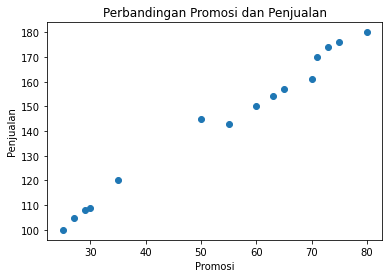

In [15]:
data = pd.DataFrame(dataset)
plt.scatter(data.promosi, data.penjualan)
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.title("Perbandingan Promosi dan Penjualan")
plt.show()

#### membagi data training

In [16]:
x = np.array(data.promosi, dtype=np.float32)
y = np.array(data.penjualan)

x_train = x.reshape(-1,1)
y_train = y

#### training proses

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

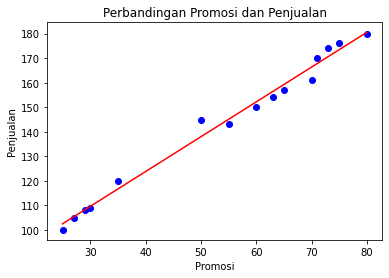

In [18]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.title("Perbandingan Promosi dan Penjualan")
plt.show()

In [19]:
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_}')

print(model.coef_ + (model.intercept_ * 100))

Intercept: 66.99479675292969
Slope: [1.419651]
[6700.899]


#### Testing process

In [20]:
x_test = np.array([62,73,82,90,100]).reshape(-1,1)
y_test = np.array([160, 170, 180, 190, 200])

prediksi_penjualan = model.predict(x_test)
print(prediksi_penjualan)

[155.01316071 170.62932205 183.40618134 194.76338959 208.9598999 ]


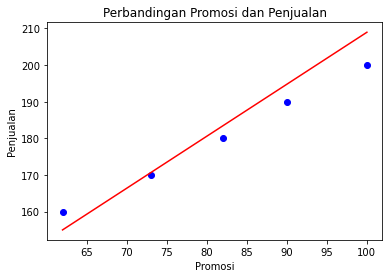

In [21]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, prediksi_penjualan, color = 'red')
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.title("Perbandingan Promosi dan Penjualan")
plt.show()

In [22]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, prediksi_penjualan)
print(r_squared)

0.8601636296950019
